# Zestaw zadań: Kwadratury
## Zadanie 1,2
### Autor: Artur Gęsiarz

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz, simps
from scipy.special import roots_legendre

### Funkcja podcalkowa

In [123]:
def f(x):
    return 4 / (1 + x ** 2)

### Dokladnie wartosc calki pi

In [124]:
exact_value = np.pi

### Zakres wartosci m

In [125]:
m_values = np.arange(1, 26)

### Lista przechowujaca liczby wezlow dla kolejnych wartosci m

In [126]:
num_nodes_list = []

### Wyniki calkowania

In [127]:
integral_mid_list = []
integral_trap_list = []
integral_simp_list = []

### Przechowywanie bledow

In [128]:
errors_mid_list = []
errors_trap_list = []
errors_simp_list = []

### Pętla po wartościach m

In [129]:
for m in m_values:
    # Obliczenie liczby węzłów
    num_nodes = 2 ** m + 1
    num_nodes_list.append(num_nodes)

    # Rozmieszczenie równoodległych węzłów
    x = np.linspace(0, 1, num_nodes)

    # Złożona kwadratura otwarta prostokątów (metoda mid-point)
    dx = (1 - 0) / num_nodes
    x_mid = (x[:-1] + x[1:]) / 2
    integral_mid = np.sum(f(x_mid) * dx)
    integral_mid_list.append(integral_mid)

    # Złożona kwadratura trapezów
    integral_trap = trapz(f(x), x)
    integral_trap_list.append(integral_trap)

    # Złożona kwadratura Simpsona
    integral_simp = simps(f(x), x)
    integral_simp_list.append(integral_simp)

    errors_mid_list.append(abs((np.pi - integral_mid_list[m-1]) / np.pi))
    errors_trap_list.append(abs((np.pi - integral_trap_list[m-1]) / np.pi))
    errors_simp_list.append(abs((np.pi - integral_simp_list[m-1]) / np.pi))

/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_61296/3956593400.py:16: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integral_trap = trapz(f(x), x)
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_61296/3956593400.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_simp = simps(f(x), x)


### Obliczenie wartości ponizej ktorej zmniejsze kroku h nie zmniejsza juz bledu kwadratury dla posczegolnych metod

### Dla metody trapezow

In [130]:
hmin_index = np.argmin(errors_trap_list)
hmin_trap = 1 / num_nodes_list[hmin_index]
print("Wartość hmin:", hmin_trap)

Wartość hmin: 1.1920927533992823e-07


### Dla metody Simpsona

In [131]:
hmin_index = np.argmin(errors_simp_list)
hmin_simp = 1 / num_nodes_list[hmin_index]
print("Wartość hmin:", hmin_simp)

Wartość hmin: 0.0038910505836575876


### Dla metody mid-point

In [132]:
hmin_index = np.argmin(errors_mid_list)
hmin_midpoint = 1 / num_nodes_list[hmin_index]
print("Wartość hmin:", hmin_midpoint)

Wartość hmin: 2.980232149951692e-08


### Funkcja do obliczenia rzedu zbieznosci

In [133]:
def calculate_convergence_order(errors, hs):
    p_values = []

    for i in range(len(errors) - 1):
        if errors[i] == 0 or errors[i+1] == 0:
            continue
        p = np.abs(np.log(errors[i+1] / errors[i]) / np.log(hs[i+1] / hs[i]))
        p_values.append(p)

    return p_values

In [134]:
hs = np.logspace(-15, -1, 70)

In [135]:
p_values_trapezoidal = calculate_convergence_order(errors_trap_list, hs)
p_values_simp = calculate_convergence_order(errors_simp_list, hs)
p_values_mid = calculate_convergence_order(errors_mid_list, hs)

In [136]:
print("Rząd zbieznosci dla metody trapezów: ",np.mean(p_values_trapezoidal))
print("Rząd zbieznosci dla metody Simpsona: ",np.mean(p_values_simp))
print("Rząd zbieznosci dla metody mid-point: ",np.mean(p_values_mid))

Rząd zbieznosci dla metody trapezów:  2.6161996872169127
Rząd zbieznosci dla metody Simpsona:  6.159188821106088
Rząd zbieznosci dla metody mid-point:  1.4462996673274364


### Dobieranie zakresu wartosci n dla metody Gaussa-Lagendre'a

In [137]:
n_values = np.arange(1, 100)

### Lista przechowująca wartości błędu względnego dla każdej liczby węzłów

In [138]:
errors_gauss_list = []

### Metoda Gaussa Legendre'a

In [139]:
def gauss_legendre_integration(n):
    nodes, weights = roots_legendre(n)

    x = 0.5 * (nodes + 1)
    w = 0.5 * weights

    integral_value = np.sum(w * f(x))

    return integral_value

### Obliczenie wartości błędu względnego dla różnych liczby węzłów

In [140]:
for m in m_values:
    # Obliczenie wartości całki metodą Gaussa-Legendre’a
    integral_value = gauss_legendre_integration(m)

    # Obliczenie błędu względnego
    error = np.abs((exact_value - integral_value) / exact_value)
    errors_gauss_list.append(error)

### Obliczenie rzędu zbieżności oraz h_min dla metody Gaussa-Lagrenge'a

In [141]:
p_values_gauss = calculate_convergence_order(errors_gauss_list, hs)
print("Rząd zbieznosci dla metody Gaussa: ",np.mean(p_values_gauss))

hmin_index = np.argmin(errors_gauss_list)
hmin_midpoint = 1 / num_nodes_list[hmin_index]
print("Wartość hmin:", hmin_midpoint)

Rząd zbieznosci dla metody Gaussa:  4.814102029088512
Wartość hmin: 0.00012205541315757354


### Rysowanie wykresu

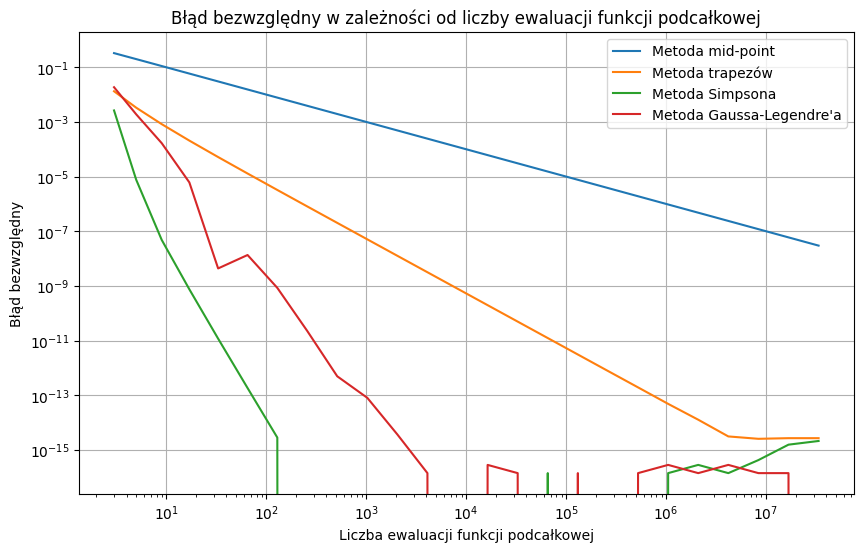

In [142]:
plt.figure(figsize=(10, 6))
plt.semilogy(num_nodes_list, errors_mid_list, label='Metoda mid-point')
plt.semilogy(num_nodes_list, errors_trap_list, label='Metoda trapezów')
plt.semilogy(num_nodes_list, errors_simp_list, label='Metoda Simpsona')
plt.semilogy(num_nodes_list, errors_gauss_list, label='Metoda Gaussa-Legendre\'a')
plt.title('Błąd bezwzględny w zależności od liczby ewaluacji funkcji podcałkowej')
plt.xlabel('Liczba ewaluacji funkcji podcałkowej')
plt.ylabel('Błąd bezwzględny')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()